# **Melanoma_Resnet50_Model**

In [ ]:
#Importing the libraries
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
! gdown 15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm

Downloading...
From: https://drive.google.com/uc?id=15nP0rjzh8n4b87zTEqnlRAKZo4hisvvm
To: /content/archive.zip
100% 104M/104M [00:01<00:00, 57.7MB/s] 


In [ ]:
!unzip /content/archive.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_643.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_644.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_645.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_646.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_647.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_648.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_649.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_65.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_650.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_651.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_652.jpg  
  inflating: /content/melanoma_cancer_dataset/train/benign/melanoma_653.jpg  
  inflating: /

In [ ]:
#Importing the Libraries
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report


In [ ]:
#Set the file Path
file_path = "/content/melanoma_cancer_dataset/train";

In [ ]:
name_class = os.listdir(file_path);
name_class

['malignant', 'benign']

In [ ]:
# Getting the file paths of the images
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/content/melanoma_cancer_dataset/train/malignant/melanoma_5891.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6397.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8161.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7625.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8201.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6117.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5883.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_7535.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5919.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_5783.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_8060.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_9055.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6010.jpg',
 '/content/melanoma_cancer_dataset/train/malignant/melanoma_6127.jpg',
 '/con

In [ ]:
# Extracting labels from file paths
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [ ]:
# Creating a DataFrame to store file paths and corresponding labels
filepath = pd.Series(filepaths, name= 'Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/melanoma_cancer_dataset/train/maligna...,malignant
1,/content/melanoma_cancer_dataset/train/benign/...,benign
2,/content/melanoma_cancer_dataset/train/benign/...,benign
3,/content/melanoma_cancer_dataset/train/maligna...,malignant
4,/content/melanoma_cancer_dataset/train/benign/...,benign


(array([0, 1]), [Text(0, 0, 'benign'), Text(1, 0, 'malignant')])

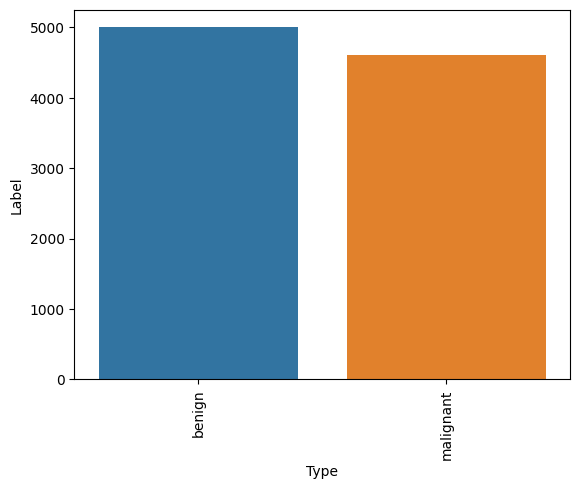

In [ ]:
# Counting the occurrences of each label
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y= counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [ ]:
# Train-Test data Split
train, test = train_test_split(data, test_size=0.25, random_state= 42 )

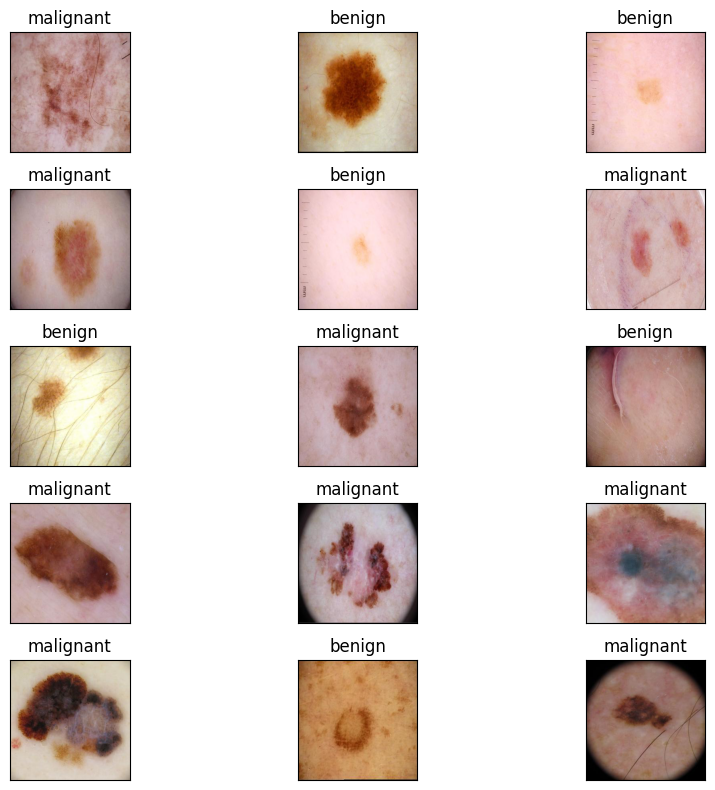

In [ ]:
# Displaying some images from the dataset
fig, axes = plt.subplots(nrows = 5, ncols = 3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
# Data Preprocessing
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen  = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# Generate batches of training data from the DataFrame
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

# Generate batches of validation data from the DataFrame
valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

# Generate batches of test data from the DataFrame
test_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100, 100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [ ]:
# Building the pretrained model ResNet50 Model
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
    
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the custom model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
# Fit the model on the training data with validation
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 37s 107ms/step - loss: 0.2679 - accuracy: 0.8913 - val_loss: 0.2166 - val_accuracy: 0.9088
Epoch 2/25
226/226 [==============================] - 22s 99ms/step - loss: 0.1896 - accuracy: 0.9232 - val_loss: 0.2181 - val_accuracy: 0.9130
Epoch 3/25
226/226 [==============================] - 21s 95ms/step - loss: 0.1670 - accuracy: 0.9350 - val_loss: 0.1981 - val_accuracy: 0.9209
Epoch 4/25
226/226 [==============================] - 22s 99ms/step - loss: 0.1437 - accuracy: 0.9438 - val_loss: 0.2116 - val_accuracy: 0.9159
Epoch 5/25
226/226 [==============================] - 22s 98ms/step - loss: 0.1238 - accuracy: 0.9525 - val_loss: 0.2140 - val_accuracy: 0.9267
Epoch 6/25
226/226 [==============================] - 22s 98ms/step - loss: 0.1106 - accuracy: 0.9584 - val_loss: 0.2534 - val_accuracy: 0.9138
Epoch 7/25
226/226 [==============================] - 21s 95ms/step - loss: 0.1024 - accuracy: 0.9632 - val_loss: 0.2105 - val_accuracy

In [ ]:
# Save the trained model
model.save("model_resnet50.h5")

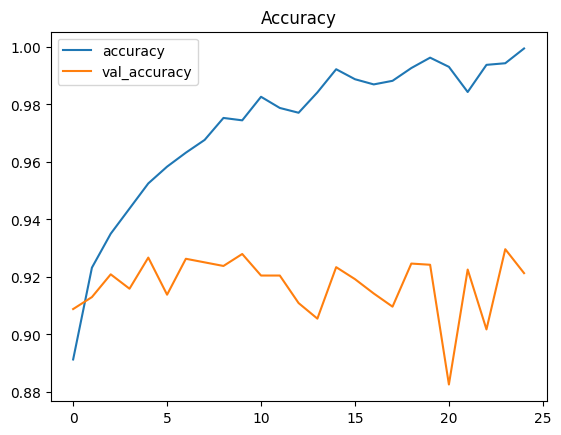

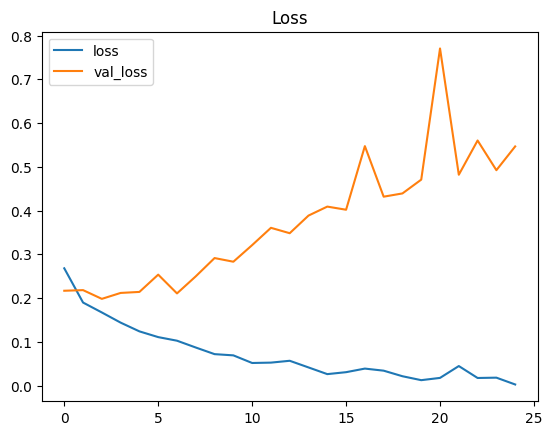

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

# Plot the loss history
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results = model.evaluate(test_gen, verbose=0)

print("   Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

   Test Loss: 0.54655
Test Accuracy: 92.13%


In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

# Map the Label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

76/76 [==============================] - 6s 68ms/step


In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.91      0.95      0.93      1249
   malignant       0.95      0.90      0.92      1153

    accuracy                           0.93      2402
   macro avg       0.93      0.93      0.93      2402
weighted avg       0.93      0.93      0.93      2402



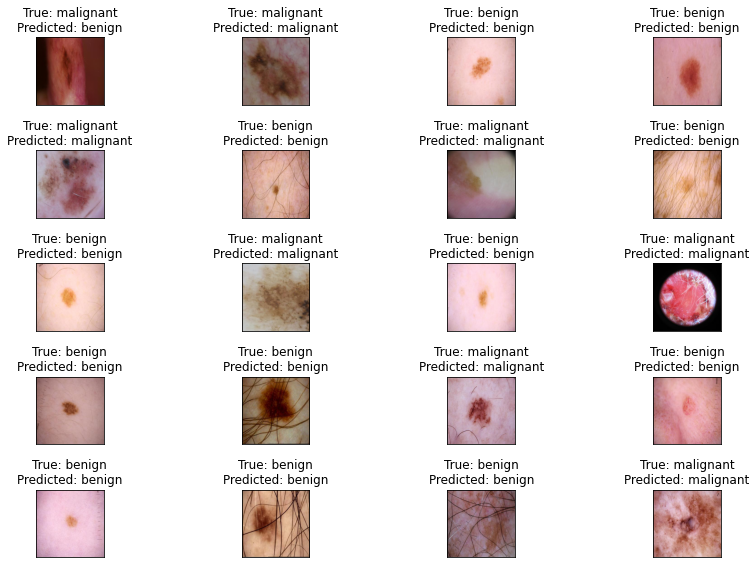

In [ ]:
# Display sample images with true and predicted labels
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model
loaded_model_imagenet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

1/1 [==============================] - 0s 26ms/step
[[99  0]]


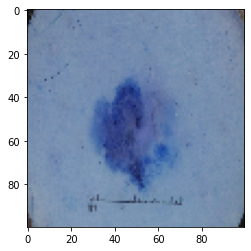

In [ ]:
# Preprocess the image
img_path = '/content/ISIC_0333091.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imagenet.predict(x)
print((result*100).astype('int'))

# Visualize the image
plt.imshow(img)

In [ ]:
# Make predictions using the model
p = list((result*100).astype('int'))
pp = list(p[0])
print(pp)

[99, 0]


In [ ]:
# Get the probabilities for each class
print("Largest Element is:", max(pp))

Largest Element is: 99


In [ ]:
# Find the class with the highest probability
index = pp.index(max(pp))

In [ ]:
name_class = ['benign', 'melignant']

In [ ]:
# Show the predicted class as the title and display the image
name_class[index]

'benign'

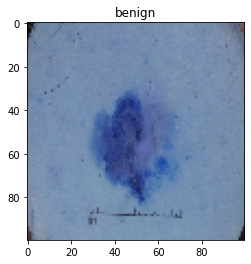

In [ ]:
plt.title(name_class[index])
plt.imshow(img)

# **Melanoma_VGG16_Model**

In [ ]:
#Import the library
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Preprocess the image
pretrained_model=VGG16(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Build the pretrained VGG16 Mode
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the VGG16 model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
# Fit the model on the training data with validation
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 25s 100ms/step - loss: 0.3074 - accuracy: 0.8873 - val_loss: 0.2590 - val_accuracy: 0.8963
Epoch 2/25
226/226 [==============================] - 22s 96ms/step - loss: 0.2008 - accuracy: 0.9189 - val_loss: 0.2419 - val_accuracy: 0.9059
Epoch 3/25
226/226 [==============================] - 21s 93ms/step - loss: 0.1720 - accuracy: 0.9331 - val_loss: 0.2443 - val_accuracy: 0.9051
Epoch 4/25
226/226 [==============================] - 22s 96ms/step - loss: 0.1498 - accuracy: 0.9431 - val_loss: 0.2514 - val_accuracy: 0.9088
Epoch 5/25
226/226 [==============================] - 21s 93ms/step - loss: 0.1180 - accuracy: 0.9571 - val_loss: 0.2521 - val_accuracy: 0.9051
Epoch 6/25
226/226 [==============================] - 22s 97ms/step - loss: 0.0975 - accuracy: 0.9628 - val_loss: 0.2623 - val_accuracy: 0.9147
Epoch 7/25
226/226 [==============================] - 22s 97ms/step - loss: 0.0812 - accuracy: 0.9703 - val_loss: 0.2865 - val_accuracy

In [ ]:
# Save the VGG16 trained model
model.save("vgg16_model.h5")

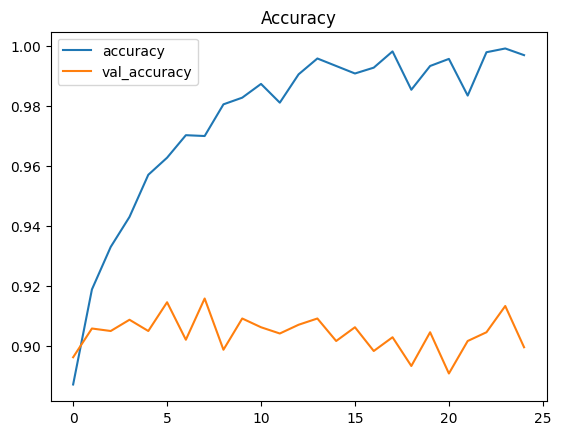

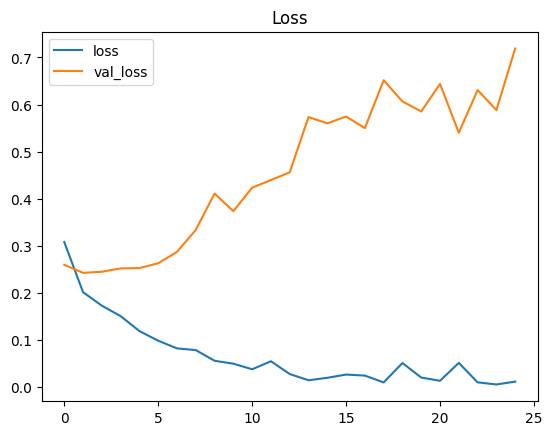

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.71918
Test Accuracy: 89.97%


In [ ]:
# Predict classes for the test data
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 6s 79ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.91      0.90      0.91      1279
   malignant       0.89      0.90      0.89      1123

    accuracy                           0.90      2402
   macro avg       0.90      0.90      0.90      2402
weighted avg       0.90      0.90      0.90      2402



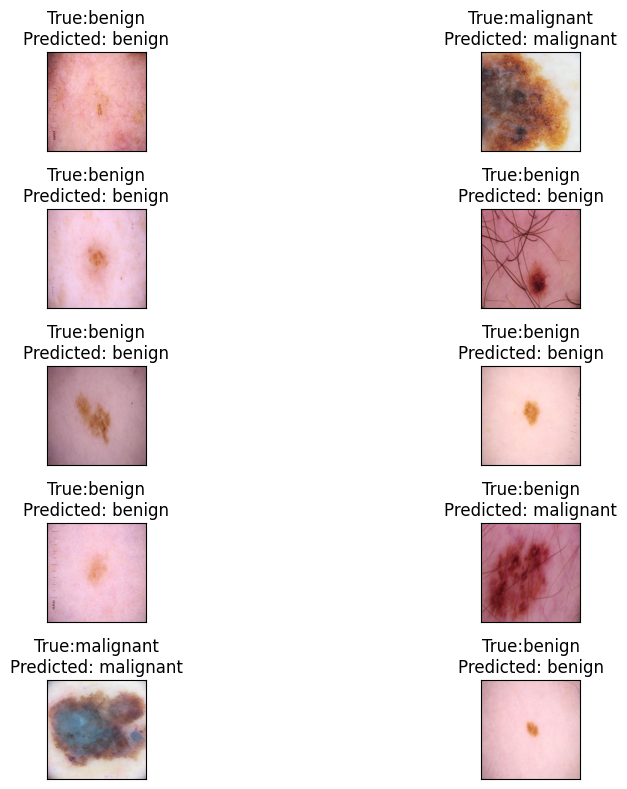

In [ ]:
# Display sample images with true and predicted labels
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# **Melanoma_InceptionV3_Model**

In [ ]:
#Importing the library
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
# Data Preprocessing
pretrained_model=InceptionV3(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
#Build the InceptionV3 model
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the InceptionV3 model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
# Fit the model on the training data with validation
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 30s 108ms/step - loss: 0.7371 - accuracy: 0.7988 - val_loss: 0.4211 - val_accuracy: 0.8297
Epoch 2/25
226/226 [==============================] - 22s 97ms/step - loss: 0.3916 - accuracy: 0.8334 - val_loss: 0.4724 - val_accuracy: 0.8114
Epoch 3/25
226/226 [==============================] - 22s 98ms/step - loss: 0.3705 - accuracy: 0.8434 - val_loss: 0.3645 - val_accuracy: 0.8405
Epoch 4/25
226/226 [==============================] - 21s 94ms/step - loss: 0.3361 - accuracy: 0.8603 - val_loss: 0.4021 - val_accuracy: 0.8306
Epoch 5/25
226/226 [==============================] - 22s 97ms/step - loss: 0.3364 - accuracy: 0.8506 - val_loss: 0.3549 - val_accuracy: 0.8347
Epoch 6/25
226/226 [==============================] - 22s 97ms/step - loss: 0.3113 - accuracy: 0.8606 - val_loss: 0.3906 - val_accuracy: 0.8443
Epoch 7/25
226/226 [==============================] - 22s 97ms/step - loss: 0.3005 - accuracy: 0.8702 - val_loss: 0.3646 - val_accuracy

In [ ]:
# Save the trained model
model.save("inceptionv3_model.h5")

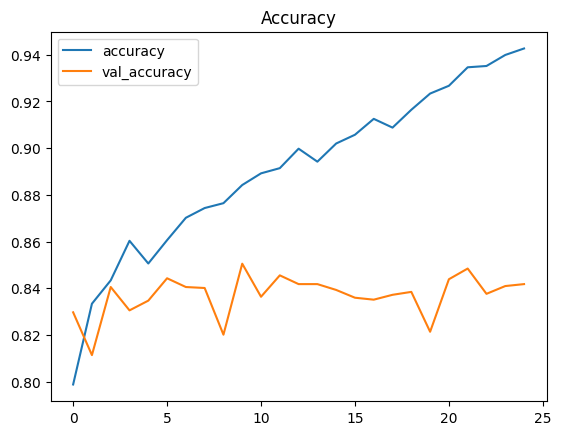

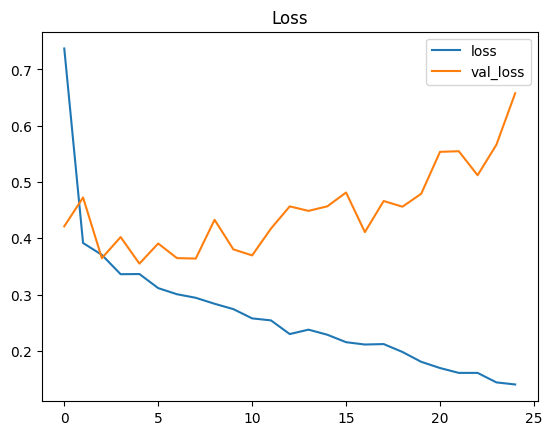

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
# Plot the loss history
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.65748
Test Accuracy: 84.18%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 7s 71ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.82      0.90      0.86      1279
   malignant       0.87      0.78      0.82      1123

    accuracy                           0.84      2402
   macro avg       0.85      0.84      0.84      2402
weighted avg       0.84      0.84      0.84      2402



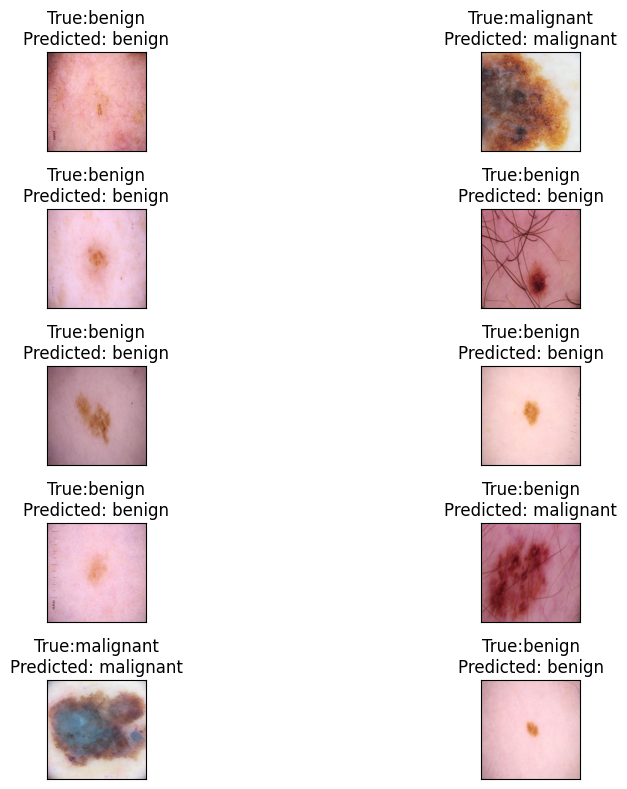

In [ ]:
# Display sample images with true and predicted labels
fig,axes=plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                     subplot_kw={'xticks': [], 'yticks': []})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True:{test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

# **Melanoma_MobileNet_Model**

In [ ]:
#importing the library
import tensorflow.compat.v2 as tf

In [ ]:
# Data Preprocessing
pretrained_model = tf.keras.applications.MobileNet(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
#Build the MobileNet model
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the MobileNet model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
# Fit the model on the training data with validation
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 24s 90ms/step - loss: 0.3360 - accuracy: 0.8520 - val_loss: 0.3074 - val_accuracy: 0.8730
Epoch 2/25
226/226 [==============================] - 19s 85ms/step - loss: 0.2736 - accuracy: 0.8841 - val_loss: 0.3013 - val_accuracy: 0.8747
Epoch 3/25
226/226 [==============================] - 21s 91ms/step - loss: 0.2529 - accuracy: 0.8955 - val_loss: 0.3123 - val_accuracy: 0.8672
Epoch 4/25
226/226 [==============================] - 19s 86ms/step - loss: 0.2289 - accuracy: 0.9027 - val_loss: 0.3149 - val_accuracy: 0.8689
Epoch 5/25
226/226 [==============================] - 21s 91ms/step - loss: 0.2000 - accuracy: 0.9189 - val_loss: 0.3184 - val_accuracy: 0.8755
Epoch 6/25
226/226 [==============================] - 19s 85ms/step - loss: 0.1755 - accuracy: 0.9299 - val_loss: 0.3845 - val_accuracy: 0.8651
Epoch 7/25
226/226 [==============================] - 20s 90ms/step - loss: 0.1548 - accuracy: 0.9370 - val_loss: 0.3737 - val_accuracy:

In [ ]:
# Save the trained model
model.save("mobileNet_model.h5")

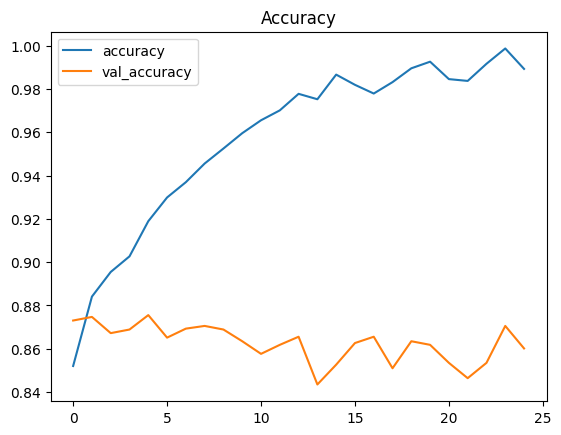

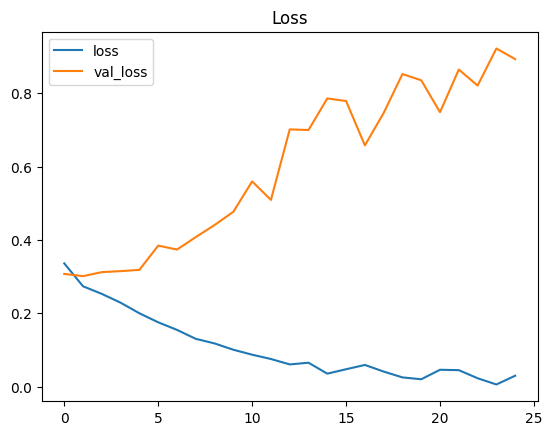

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
# Plot the loss history
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.89285
Test Accuracy: 86.01%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 5s 58ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.85      0.89      0.87      1279
   malignant       0.87      0.83      0.85      1123

    accuracy                           0.86      2402
   macro avg       0.86      0.86      0.86      2402
weighted avg       0.86      0.86      0.86      2402



# **Melanoma_MobileNetV2_Model**

In [ ]:
#Importing the library
import tensorflow.compat.v2 as tf

In [ ]:
# Data Preprocessing
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
#Build the MobileNetV2 model
inputs=pretrained_model.input
x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs=Dense(2,activation='sigmoid')(x)

model=Model(inputs=inputs, outputs=outputs)

In [ ]:
#Compile the MobileNetV2 model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
### Function for early stopping of training epochs if no change in validation accuracy
my_callbacks=[EarlyStopping(monitor='val_accuracy',
                           min_delta=0,
                           patience=2,
                           mode='auto')]

In [ ]:
# Fit the model on the training data with validation
history=model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=25
)

Epoch 1/25
226/226 [==============================] - 28s 100ms/step - loss: 0.3647 - accuracy: 0.8415 - val_loss: 0.3259 - val_accuracy: 0.8597
Epoch 2/25
226/226 [==============================] - 20s 87ms/step - loss: 0.3003 - accuracy: 0.8752 - val_loss: 0.3036 - val_accuracy: 0.8714
Epoch 3/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2700 - accuracy: 0.8844 - val_loss: 0.3227 - val_accuracy: 0.8626
Epoch 4/25
226/226 [==============================] - 20s 90ms/step - loss: 0.2501 - accuracy: 0.8916 - val_loss: 0.3780 - val_accuracy: 0.8381
Epoch 5/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2208 - accuracy: 0.9059 - val_loss: 0.2897 - val_accuracy: 0.8784
Epoch 6/25
226/226 [==============================] - 21s 93ms/step - loss: 0.2087 - accuracy: 0.9123 - val_loss: 0.3335 - val_accuracy: 0.8759
Epoch 7/25
226/226 [==============================] - 21s 92ms/step - loss: 0.1953 - accuracy: 0.9180 - val_loss: 0.3221 - val_accuracy

In [ ]:
# Save the MobileNetV2 model
model.save("mobileNetV2_model.h5")

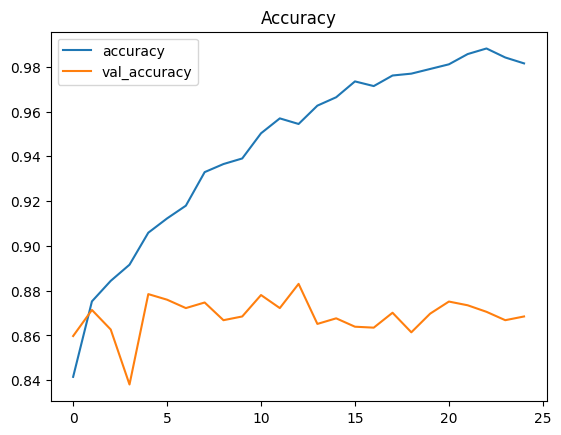

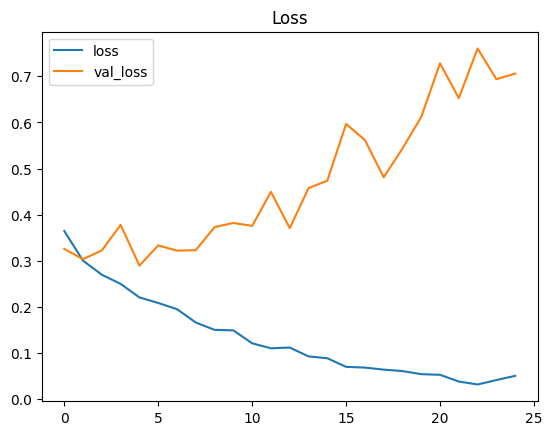

In [ ]:
# Plot the accuracy history
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
pd.DataFrame(history.history)[['loss','val_loss']].plot()
# Plot the loss history
plt.title("Loss")
plt.show()

In [ ]:
# Evaluate the model on the test data
results=model.evaluate(test_gen,verbose=0)
print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.70583
Test Accuracy: 86.84%


In [ ]:
#Predict
pred=model.predict(test_gen)
pred=np.argmax(pred,axis=1)

#Map
labels=(train_gen.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 5s 63ms/step


In [ ]:
y_test=list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      benign       0.88      0.87      0.88      1279
   malignant       0.86      0.86      0.86      1123

    accuracy                           0.87      2402
   macro avg       0.87      0.87      0.87      2402
weighted avg       0.87      0.87      0.87      2402

